# Dijkstra's Algorithm

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
color = {'orange': '#FF4B00', 'blue': '#005AFF', 'green': '#03AF7A', 'purple': '#990099'}

## Make Map

[INFO] size of the map is: (12, 14)
[INFO] start point: (0, 1), goal point: (11, 13)


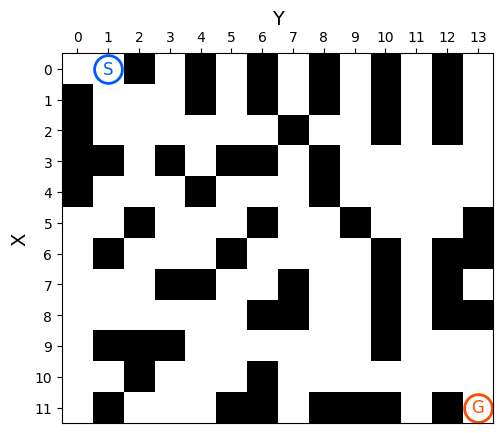

In [54]:
###### YOU CAN CHANGE MAP HERE ######
# map parameters
(START_X, START_Y) = ( 0,  1)
( GOAL_X,  GOAL_Y) = (11, 13)
# make a map which is a set of cells, each cell is a 0 or 1, 0 means a free cell, 1 means an obstacle
# (x, y)   y=0    y=1    y=2
#   x=0  (0, 0) (0, 1) (0, 2) ...
#   x=1  (1, 0) (1, 1) (1, 2) ...
#   x=2  (2, 0) (2, 1) (2, 2) ...
obstacle_map = np.array([
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1],
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
])
#####################################

# get the size of the map
map_x_length, map_y_length = obstacle_map.shape[0], obstacle_map.shape[1]
print(f"[INFO] size of the map is: ({map_x_length}, {map_y_length})")

# check if the start and goal points are inside the map area
if 0 <= START_X < map_x_length and 0 <= START_Y < map_y_length and 0 <= GOAL_X < map_x_length and 0 <= GOAL_Y < map_y_length:
    print(f"[INFO] start point: ({START_X}, {START_Y}), goal point: ({GOAL_X}, {GOAL_Y})")
else:
    raise ValueError('[ERROR] The start or goal point is out of the map!')
# check if the start and goal points are in an obstacle
if obstacle_map[START_X, START_Y] == 1:
    raise ValueError('[ERROR] The start point is in an obstacle!')
if obstacle_map[GOAL_X, GOAL_Y] == 1:
    raise ValueError('[ERROR] The goal point is in an obstacle!')

# plot the map (note that the x and y are swapped only for natural visualization)
fig, ax = plt.subplots()
ax.imshow(obstacle_map, cmap='gray_r')
ax.set_xlabel('Y', fontsize=14)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_ylabel('X', fontsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # draw x ticks every 1
ax.yaxis.set_major_locator(ticker.MultipleLocator(1)) # draw y ticks every 1
ax.scatter(START_Y, START_X, s=400, ec=color["blue"], fc="white", lw=2) # start point
ax.text(START_Y, START_X, 'S', color=color["blue"], fontsize=12, va='center', ha='center') # draw "S" letter
ax.scatter(GOAL_Y, GOAL_X, s=400, ec=color["orange"], fc="white", lw=2) # goal point
ax.text(GOAL_Y, GOAL_X, 'G', color=color["orange"], fontsize=12, va='center', ha='center') # draw "G" letter
plt.show()